## LendingClub

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict whether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [8]:
import pandas as pd

In [10]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

**Creating a function which we can use throughout the project to understand the feature description**

In [136]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [13]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


## Loading the data and other imports

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [125]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# EDA

**As we are attempting the predict loan_status, let's see the ratio between Fully paid vs Chanrged Off**


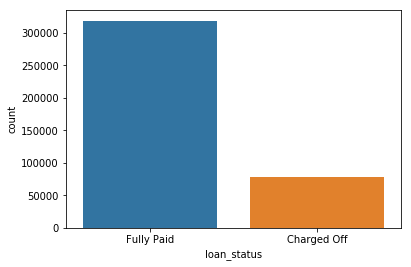

In [127]:
sns.countplot(x="loan_status",data=df)

Notice that we have a lot more entries of people that fully pay off their loans as compare to one who did no pay back. This is very common scenario for the Funding Organisations.

This means we can expect to probably do very well in terms of accuracy but our precision
and recall are going to be the true metrics that we'll have to evaluate our model based off of.



***Let's see the distribution for Loan Amount***

(0, 45000)

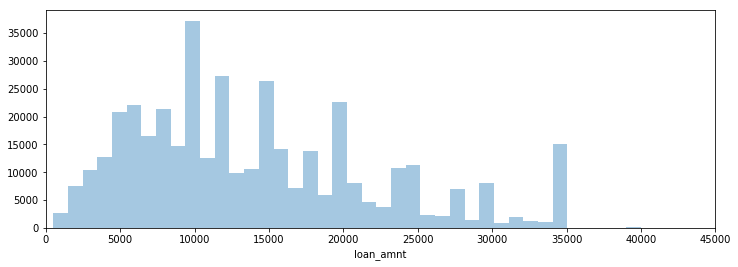

In [128]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

We can see peaks for even amount, which makes sense.

**Let's explore correlation between the continuous feature variables.**

In [129]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


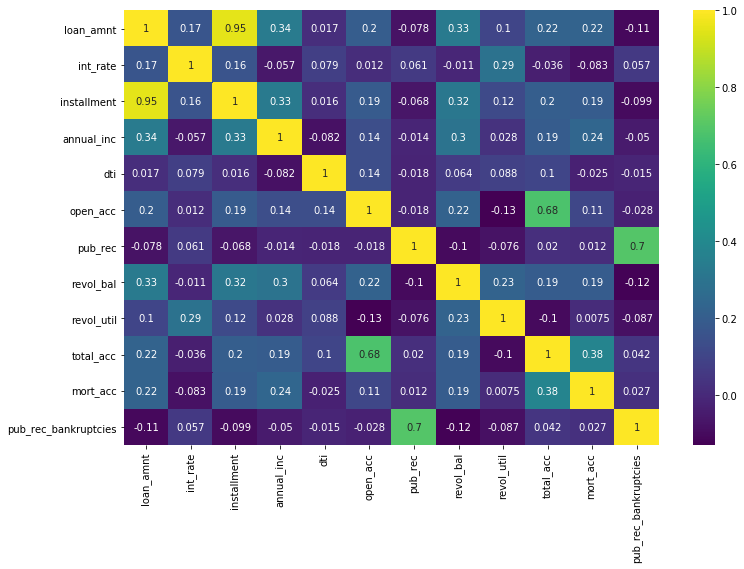

In [130]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),cmap='viridis',annot=True)

**There is a perfect correlation with the "installment" feature against "loan_amnt". Let's explore this feature further, does this relationship make sense? Is there duplicate information here? Dup data may increase the bias**

In [131]:
#Installment
print('installment')
feat_info('installment')

#Loan_amount
print('\nloan_amnt')
feat_info('loan_amnt')

installment
The monthly payment owed by the borrower if the loan originates.

loan_amnt
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


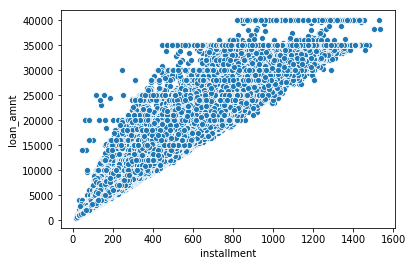

In [132]:
sns.scatterplot(x="installment",y="loan_amnt",data=df)

This makes sense, as in general if loan amount is high then associated installment also goes high.

**Is it a case that,there is relationship between really expensive loans and not being able to pay them off or very low amount loans and then fully paying those off.**

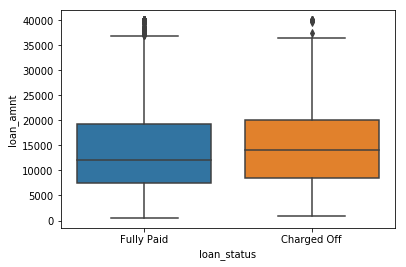

In [133]:
sns.boxplot(x="loan_status",y="loan_amnt",data=df)

On an average, the loan amount for "Charged off" is slghtly higher than "Fully Paid", as it's harder to pay back larger loans. But definitely it is not a key feature to determine the ultimate result.

***Let's find the key attributes in the dataset***

Firstly, explore the Grade and SubGrade columns that LendingClub attributes to the loans.

In [134]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [135]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

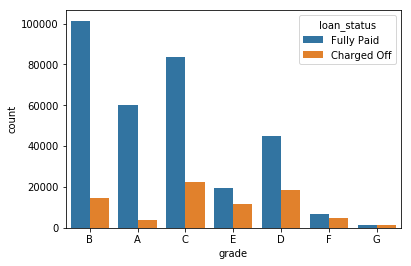

In [27]:
sns.countplot(x="grade",data=df,hue="loan_status")

Text(0.5,0,'sub_grade')

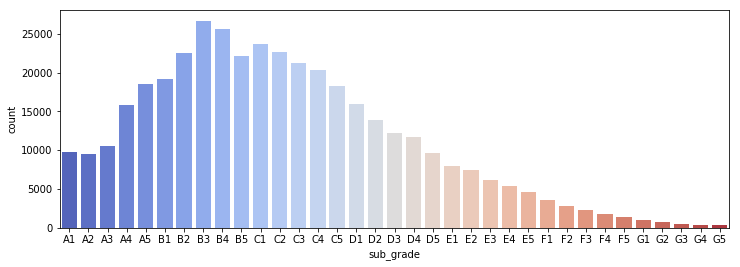

In [28]:
fig = plt.figure(figsize=(12,4))
sns.countplot(x=sorted(df["sub_grade"]),data=df,palette='coolwarm')
plt.xlabel("sub_grade")

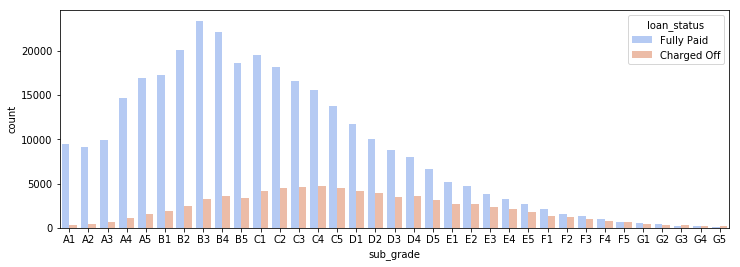

In [29]:
#fig = plt.figure(figsize=(12,4))
#sns.countplot(x=sorted(df["sub_grade"]),data=df,hue="loan_status")
#plt.xlabel("sub_grade")


plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

**It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

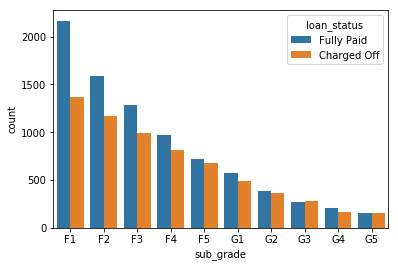

In [30]:
f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]

sort_order = sorted((f_and_g["sub_grade"]).unique())

sns.countplot(x=f_and_g["sub_grade"],data= f_and_g,order= sort_order,hue="loan_status")




**Let's label the loan_status column into 1 & 0**

In [31]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [32]:
df[["loan_repaid","loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Correlation of all the features with Loan_repaid feature**

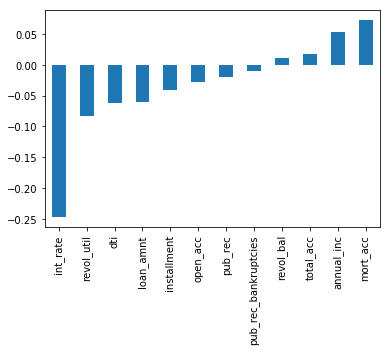

In [33]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')


#  Data PreProcessing




In [34]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


# Missing Data

**Let's explore this missing data columns.**

In [35]:
len(df)

396030

In [36]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Percentage**

In [37]:
df.isnull().sum()*100/396030

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [38]:
feat_info("emp_title")

feat_info("emp_length")

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [39]:
df["emp_title"].nunique()

173105

In [40]:
df["emp_title"].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
Chief, Real Estate Management Division         1
music teacher                                  1
Director, Business Dev. Pricing & Resear       1
Information technology specialist              1
(NGAR) CSMS - B Maintenance                    1
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [41]:
df = df.drop('emp_title',axis=1)

**Let's go ahead with "emp_length" feature**

In [42]:
sorted(df["emp_length"].dropna().unique())


['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

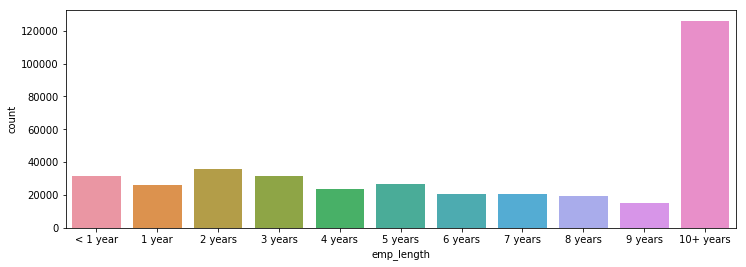

In [43]:
plt.figure(figsize=(12,4))
ordered = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
sns.countplot(x="emp_length",data=df,order=ordered)

**Compare the emp_length with final outcome(Fully Paid vs Charged Off)**

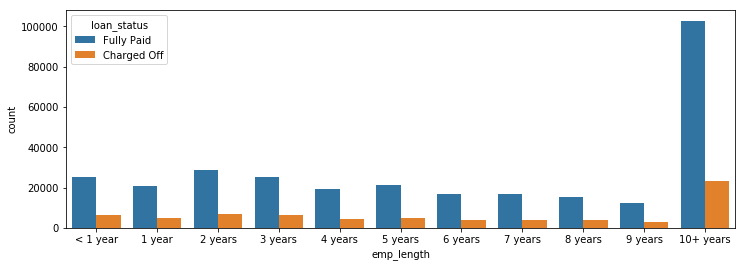

In [44]:
plt.figure(figsize=(12,4))
sns.countplot(x="emp_length",data=df,order=ordered,hue="loan_status")

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Lets draw the ratio "Charged Off" vs "Fully Paid" ans see the relationship with number of years of experience for applicant**

In [45]:
emp_co = df[df["loan_status"]=="Charged Off"].groupby("emp_length").count()["loan_status"]


In [46]:
emp_fp = df[df["loan_status"]=="Fully Paid"].groupby("emp_length").count()["loan_status"]

In [47]:
emp_ratio = emp_co/emp_fp
emp_ratio

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

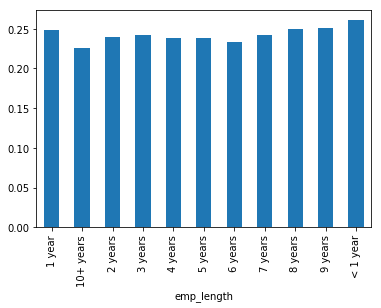

In [48]:
emp_ratio.plot(kind='bar')

As we can see the ratio is evenly distributed against the outcome, therefore dropping the "emp_length" feature.Doesn;t make any significant difference!

In [49]:
df = df.drop("emp_length",axis=1)

In [50]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Review the title column vs the purpose column.**

In [51]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [52]:
df['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.

In [53]:
df = df.drop('title',axis=1)



**mort_acc feature represents**

In [54]:
feat_info("mort_acc")

Number of mortgage accounts.


In [103]:
df["mort_acc"].value_counts().head()

0.0    139708
1.0     60384
2.0     49908
3.0     38022
4.0     27865
Name: mort_acc, dtype: int64

***There are several ways to deal with missing data. I am finding the highly correalated feature and will associate accordingly***

In [56]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [57]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']


**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.**



In [58]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
    
        

In [59]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [60]:
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [61]:
df= df.dropna()

## Categorical Variables and Dummy Variables


In [63]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term feature


In [64]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [65]:
#df["term"] = df["term"].map({' 36 months':36,' 60 months':60}) // Alternate way to do this
df['term'] = df['term'].apply(lambda term: int(term[:3]))

#Removing the string "months" from the feature

In [66]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [67]:
df = df.drop("grade",axis=1)
#df[['verification_status', 'application_type','initial_list_status','purpose' ]]

**Converting the subgrade into dummy variables. Then concatenate these new columns to the original dataframe.**

In [68]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [69]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [70]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [71]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [72]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

### verification_status, application_type,initial_list_status,purpose 
**Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables**

In [73]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [74]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### home_ownership
**Reviewing the value_counts for the home_ownership column.**

In [75]:
df["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

**Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.**

In [76]:
#df["home_ownership"]= df['home_ownership'].map({'NONE':'OTHER','ANY':'OTHER'})

df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address


In [77]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

**Let's feature engineer a zip code column from the address in the data set and make this zip_code column into dummy variables using pandas**

In [78]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [79]:
df= df.drop("issue_d",axis=1)

### earliest_cr_line

In [80]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

**This appears to be a historical time stamp feature. Extract the year from this feature and then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.**

In [81]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [82]:
df.select_dtypes(object).columns

Index(['loan_status'], dtype='object')

***Drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.***

In [83]:
df = df.drop("loan_status",axis=1)

## Train Test Split

**Import train_test_split from sklearn.**

In [84]:
from  sklearn.model_selection import train_test_split

In [85]:
X = df.drop("loan_repaid",axis=1).values
y = df["loan_repaid"].values

In [86]:
#df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**Perform a train/test split with test_size=0.2**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

**Using a MinMaxScaler to normalize the feature data X_train and X_test. We don't want data leakge from the test set so we only fit on the X_train data.**

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scale = MinMaxScaler()

In [90]:
X_train = scale.fit_transform(X_train)

In [91]:
X_test = scale.transform(X_test)

# Creating the Model


**Build a sequential model which will be trained on the data**

In [92]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout


In [93]:

model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(19, activation='relu'))
model.add(Dense(0.2))



model.add(Dense(units=1,activation='sigmoid'))



model.compile(loss='binary_crossentropy', optimizer='adam')



model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')


#Helpful link

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

**Fit the model**

In [94]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))


Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 9s 30us/step - loss: 0.2991 - val_loss: 0.2648
Epoch 2/25
316175/316175 [==============================] - 10s 30us/step - loss: 0.2654 - val_loss: 0.2633
Epoch 3/25
316175/316175 [==============================] - 7s 23us/step - loss: 0.2628 - val_loss: 0.2622
Epoch 4/25
316175/316175 [==============================] - 8s 24us/step - loss: 0.2616 - val_loss: 0.2617
Epoch 5/25
316175/316175 [==============================] - 8s 24us/step - loss: 0.2608 - val_loss: 0.2615
Epoch 6/25
316175/316175 [==============================] - 8s 24us/step - loss: 0.2601 - val_loss: 0.2614
Epoch 7/25
316175/316175 [==============================] - 8s 25us/step - loss: 0.2598 - val_loss: 0.2615
Epoch 8/25
316175/316175 [==============================] - 7s 24us/step - loss: 0.2596 - val_loss: 0.2613
Epoch 9/25
316175/316175 [==============================] - 8s 25us/step - loss: 0.2592 - va

# Evaluating Model Performance.

**validation loss versus the training loss.**

In [95]:
losses = pd.DataFrame(model.history.history)

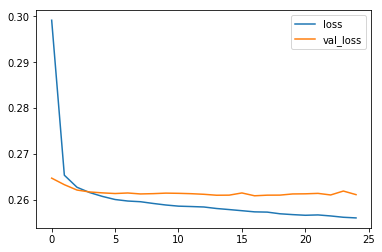

In [96]:
losses[['loss','val_loss']].plot()

**Create predictions from the X_test set and display a classification report for the X_test set.**

In [138]:
from sklearn.metrics import classification_report

In [100]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      0.43      0.60     15658
          1       0.88      1.00      0.93     63386

avg / total       0.90      0.89      0.87     79044



**Given the customer below, would you offer this person a loan?**

In [101]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

**Let's check, did this person actually end up paying back their loan?**

In [102]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

In [139]:
pwd

'C:\\Users\\syerekar\\Videos\\OpenCv\\Computer-Vision-with-Python\\Project'

# Indeed, he repaid the loan :)